In [2]:
import math
import pickle
import os
import numpy as np
import pandas as pd
from numpy.linalg import inv,pinv
import matplotlib.pyplot as plt
import sys
from IPython import display
import time
%matplotlib inline

def getAllMulti(dI,Ri=3):

    
    oName='datasets/all_data/MRCLAM_Dataset{}/Robot{}_Odometry.dat'.format(dI,Ri)
    mName='datasets/all_data/MRCLAM_Dataset{}/Robot{}_Measurement.dat'.format(dI,Ri)
    gName='datasets/all_data/MRCLAM_Dataset{}/Robot{}_Groundtruth.dat'.format(dI,Ri)
    lName='datasets/all_data/MRCLAM_Dataset{}/Landmark_Groundtruth.dat'.format(dI,Ri)
    bName='datasets/all_data/MRCLAM_Dataset{}/Barcodes.dat'.format(dI)

    namesOdom="Time[s]    forward_velocity[m/s]    angular_velocity[rad/s]".split()
    odom=pd.read_csv(oName,sep=r"\s*",skiprows=4,names=namesOdom,engine='python')

    namesMeas="Time[s]    Subject_#    range[m]    bearing[rad]".split()
    meas=pd.read_csv(mName,sep=r"\s*",skiprows=4,names=namesMeas,engine='python')

    namesGroun="Time[s]    x[m]    y[m]    orientation[rad]".split()
    groun=pd.read_csv(gName,sep=r"\s*",skiprows=4,names=namesGroun,engine='python')

    namesLand=" Subject#    x[m]    y[m]    xstd-dev[m]    ystd-dev[m]".split()
    land=pd.read_csv(lName,sep=r"\s*",skiprows=4,names=namesLand,engine='python')

    namesBar=" Subject#    Barcode#".split()
    bar=pd.read_csv(bName,sep=r"\s*",skiprows=4,names=namesBar,engine='python')

    odom=np.array(odom.values)
    meas=np.array(meas.values)
    groun=np.array(groun.values)
    land=np.array(land.values)
    bar=np.array(bar.values)
    
    barDik={int(row[0]):int(row[1]) for row in bar}
    landDik={barDik[int(row[0])]:row[1:3] for row in land}
    
    return odom,meas,groun,landDik

rand rob  [12  8  9 11  5 15  0 16]
ERROR! Session/line number was not unique in database. History logging moved to new session 182
how much are good vs concurrent 8856 2795
average blue [[ 1.546  -0.4108]
 [ 1.857  -0.299 ]
 [ 2.0016 -0.176 ]
 [ 2.851   0.05  ]
 [ 4.144   0.31  ]
 [ 5.521   0.468 ]
 [ 7.427   0.52  ]] average blue abt [  0.   0.   0.   5.  18.  23.  57.] count abs 506
how much are good vs concurrent 4011 760
average blue [[ 1.651  -0.045 ]
 [ 2.1074  0.053 ]
 [ 2.466   0.128 ]
 [ 3.165   0.267 ]
 [ 4.53    0.429 ]
 [ 5.376   0.534 ]
 [ 7.307   0.57  ]] average blue abt [   0.    0.    0.    9.   18.   34.  143.] count abs 321
how much are good vs concurrent 11483 4604
average blue [[ 1.49    -0.413  ]
 [ 1.903   -0.268  ]
 [ 2.334   -0.161  ]
 [ 3.176    0.028  ]
 [ 4.53075  0.266  ]
 [ 5.936    0.41   ]
 [ 7.516    0.482  ]] average blue abt [  0.    0.    0.    0.   16.   18.   44.5] count abs 767
how much are good vs concurrent 6697 2008
average blue [[ 1.4464 -0.4

C:\Users\User\Miniconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


how much are good vs concurrent 6852 2355
average blue [[ 1.597   -0.375  ]
 [ 1.9304  -0.239  ]
 [ 2.3     -0.151  ]
 [ 3.082    0.014  ]
 [ 4.302    0.216  ]
 [ 5.25     0.349  ]
 [ 7.1      0.47148]] average blue abt [  0.     0.     0.     0.    17.    26.    97.47] count abs 402
how much are good vs concurrent 6728 2023
average blue [[  1.52400000e+00  -3.29000000e-01]
 [  1.75800000e+00  -2.16000000e-01]
 [  1.99100000e+00  -2.04000000e-01]
 [  2.72200000e+00  -2.00000000e-03]
 [  3.40900000e+00   1.21000000e-01]
 [  3.94300000e+00   3.12000000e-01]
 [  6.31669000e+00   4.67000000e-01]] average blue abt [  0.   0.   0.  11.  22.  24.  73.] count abs 509
how much are good vs concurrent 4771 1253
average red [[ 1.543   -0.3838 ]
 [ 1.934   -0.26   ]
 [ 2.272   -0.165  ]
 [ 2.95     0.025  ]
 [ 3.787    0.237  ]
 [ 4.888    0.37   ]
 [ 6.59142  0.475  ]] average red abt [   0.    0.    0.   12.   18.   32.  100.] count abs 254
how much are good vs concurrent 5243 1357
average blue [

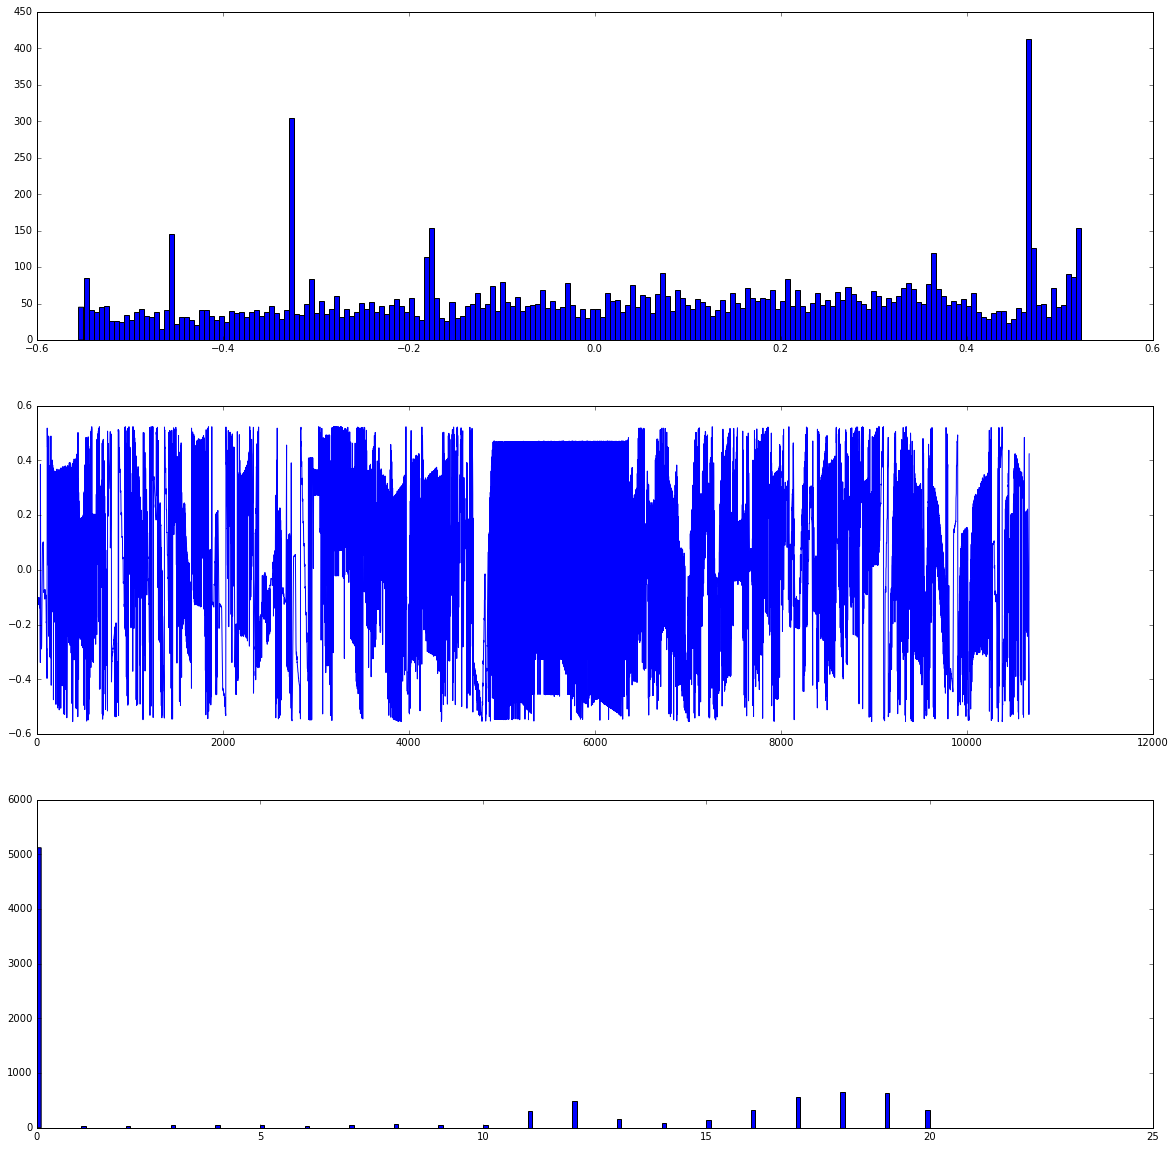

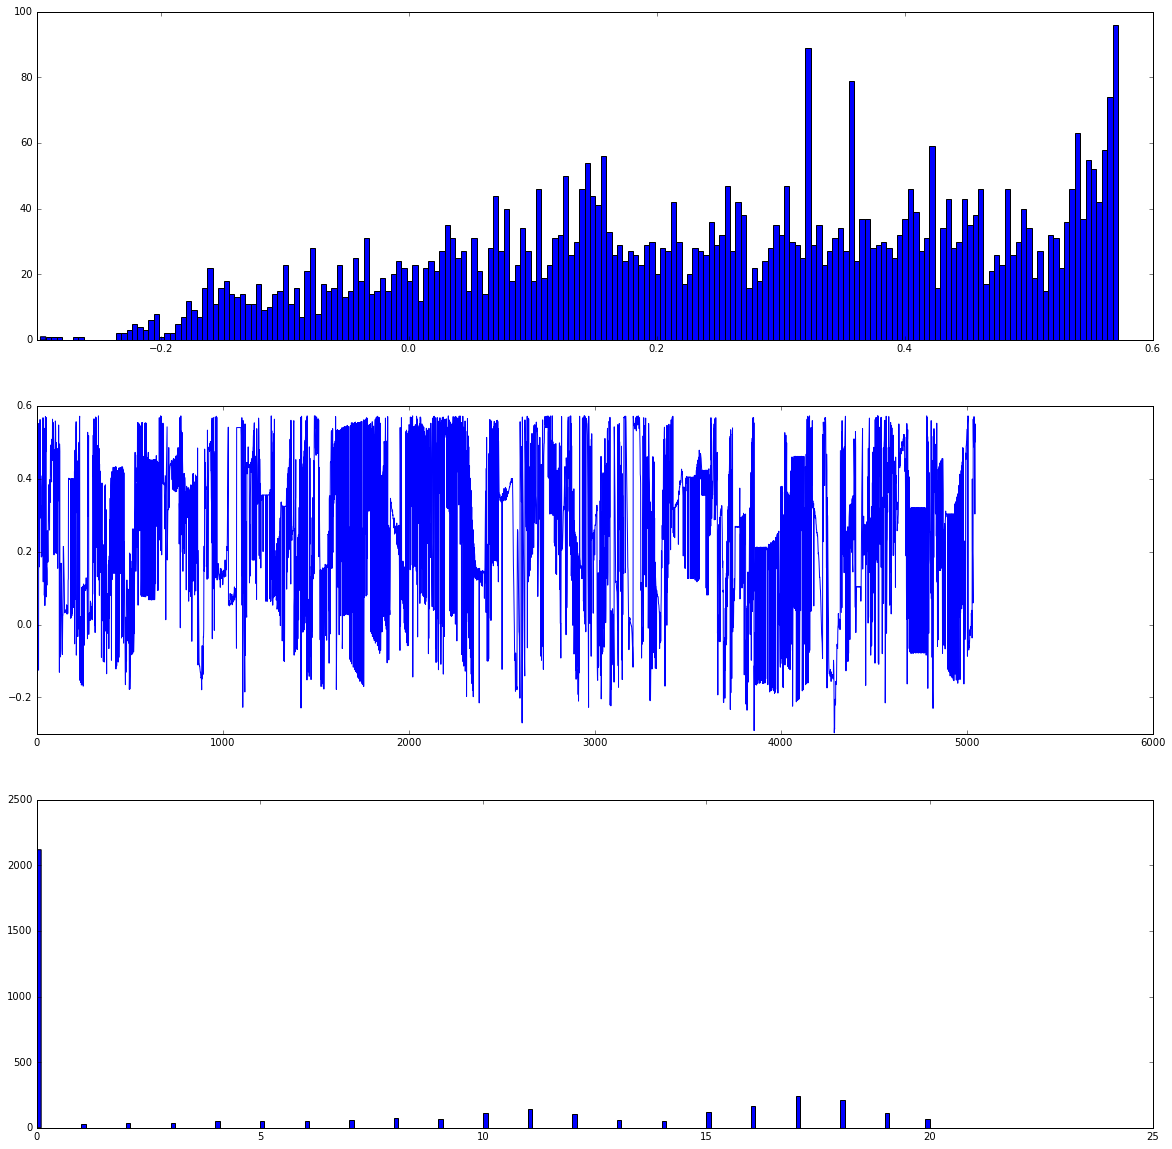

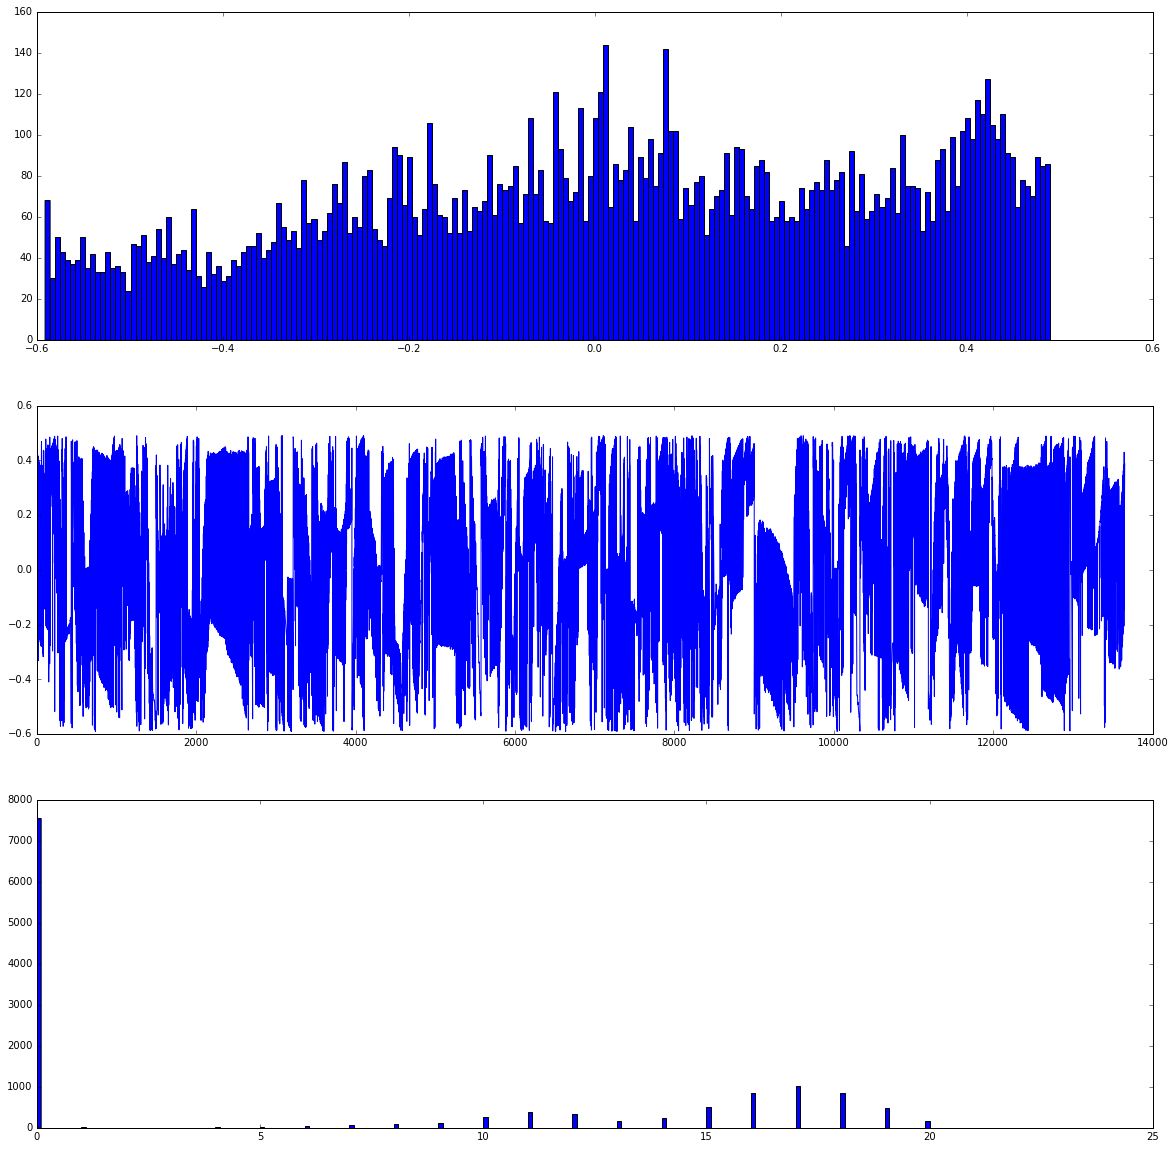

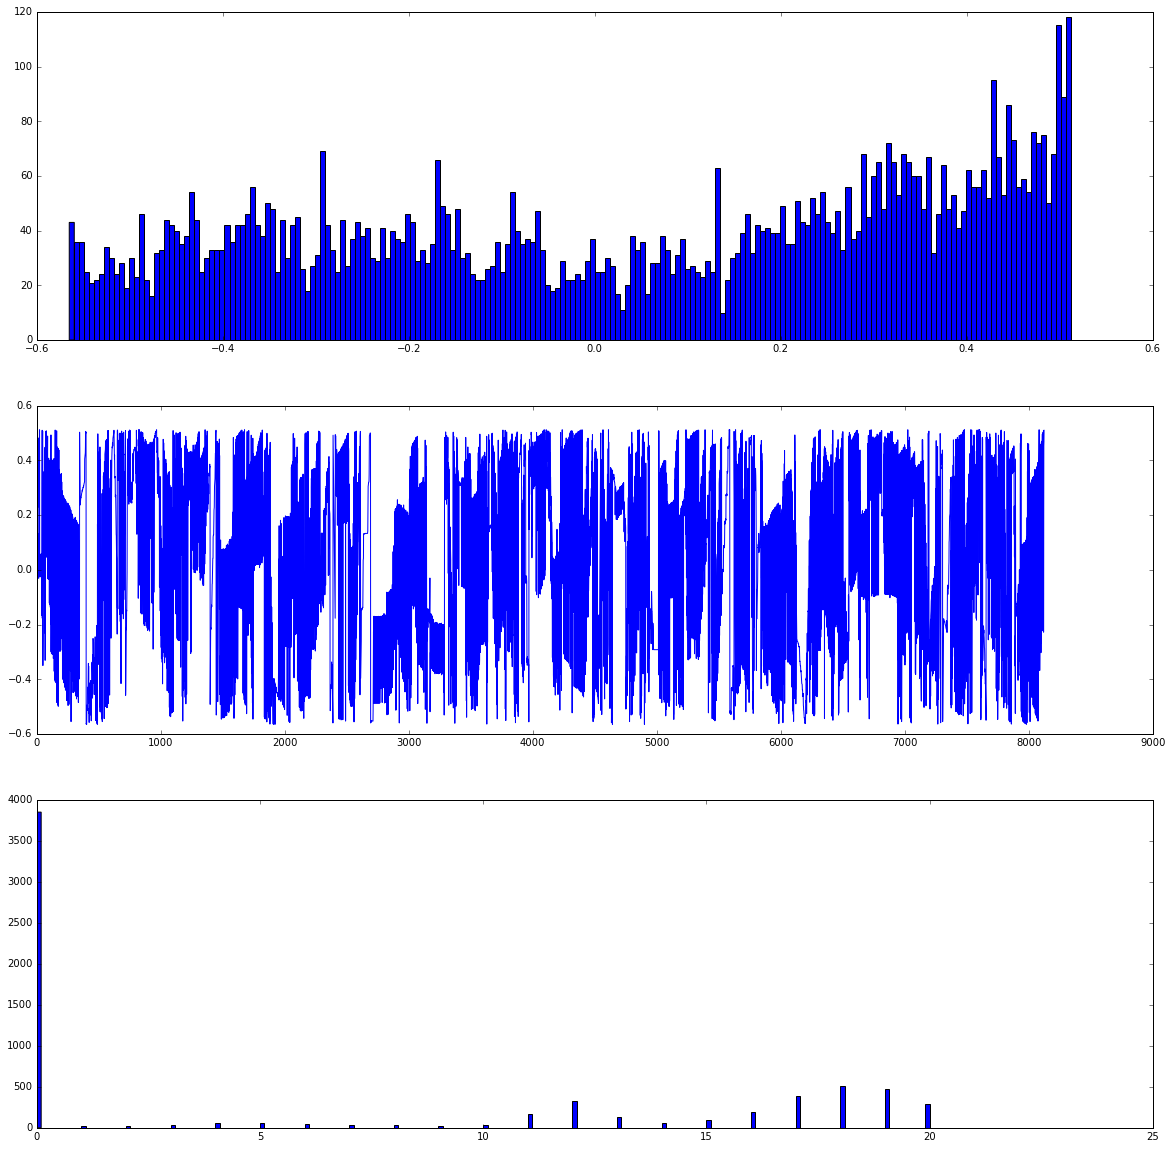

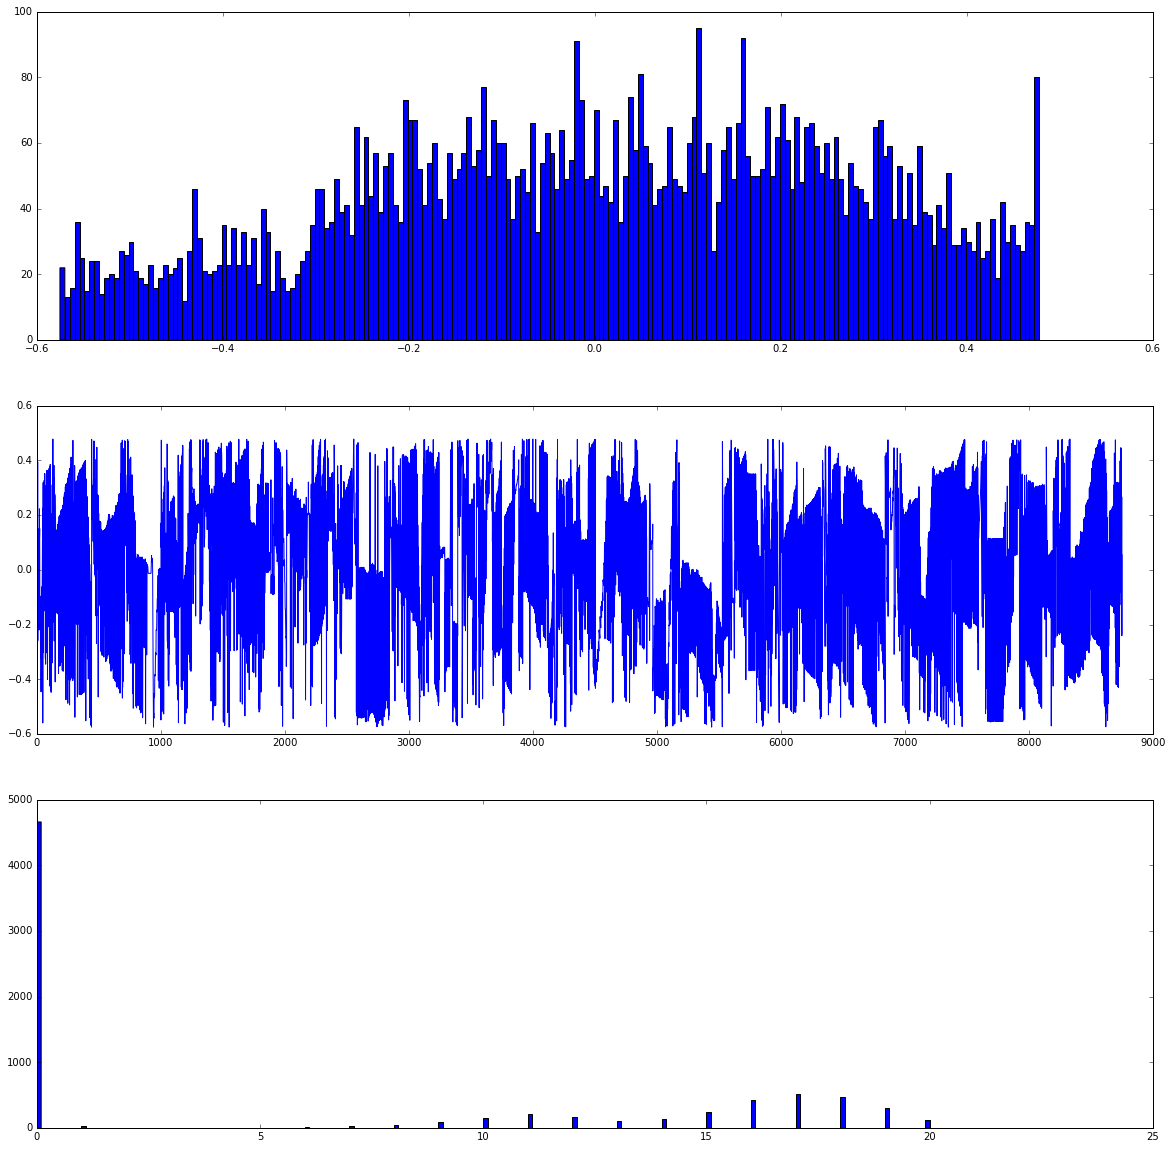

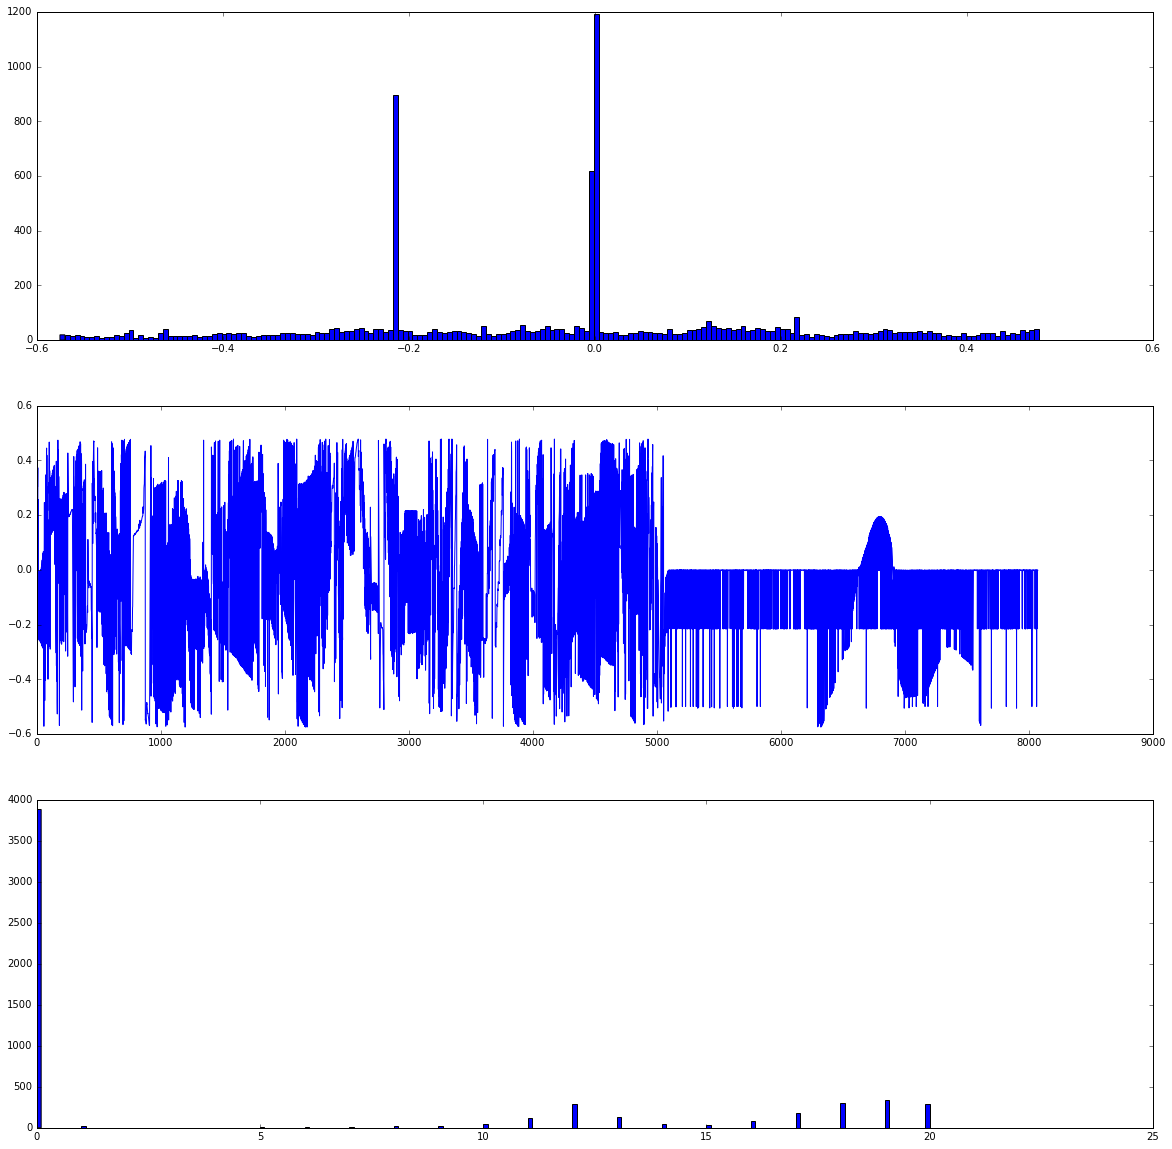

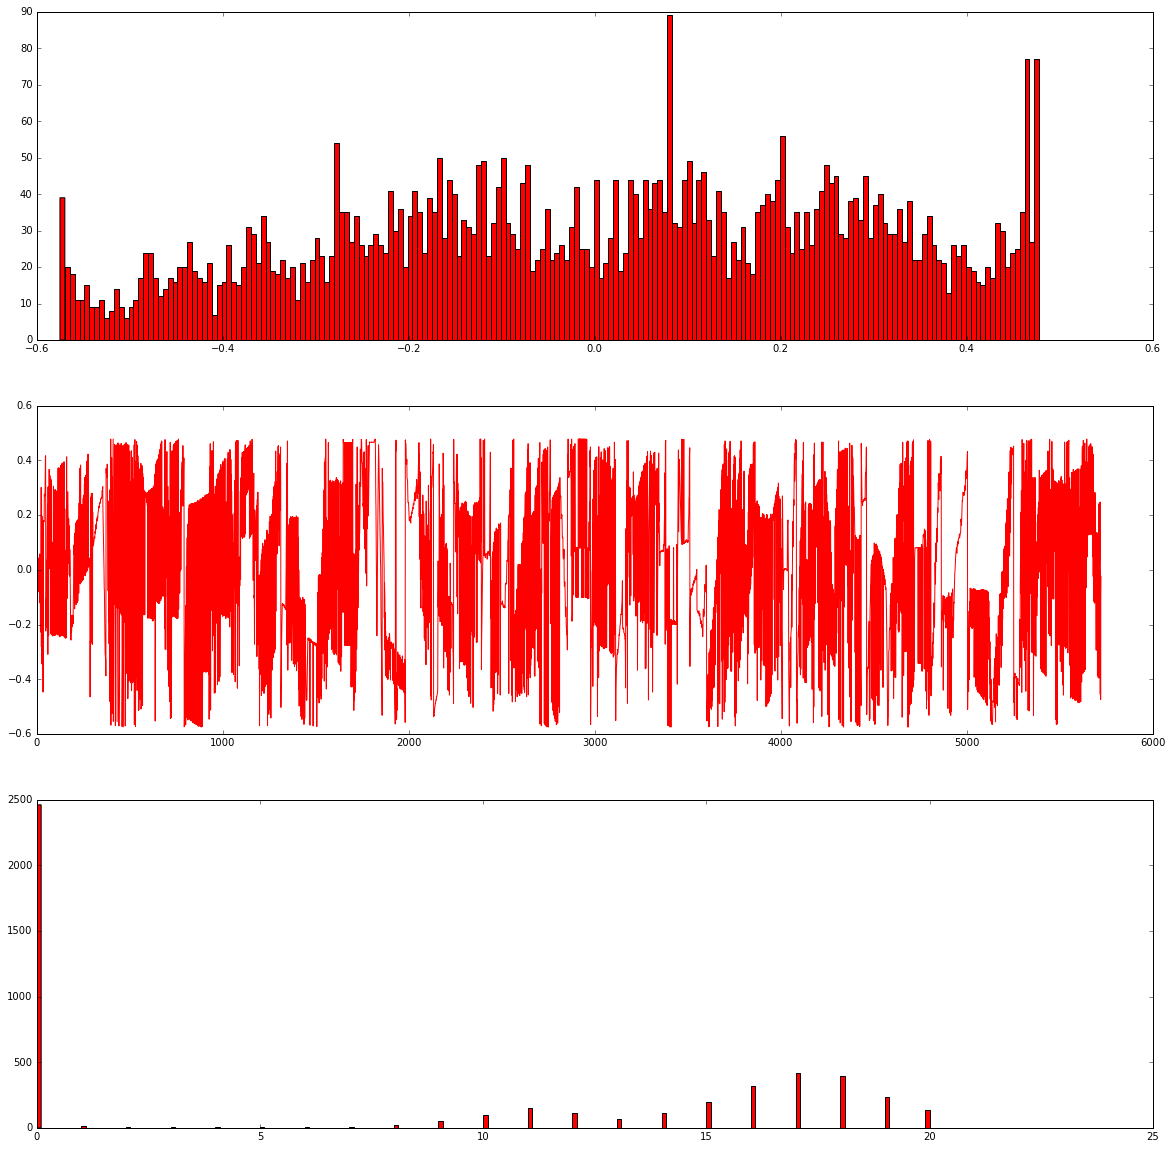

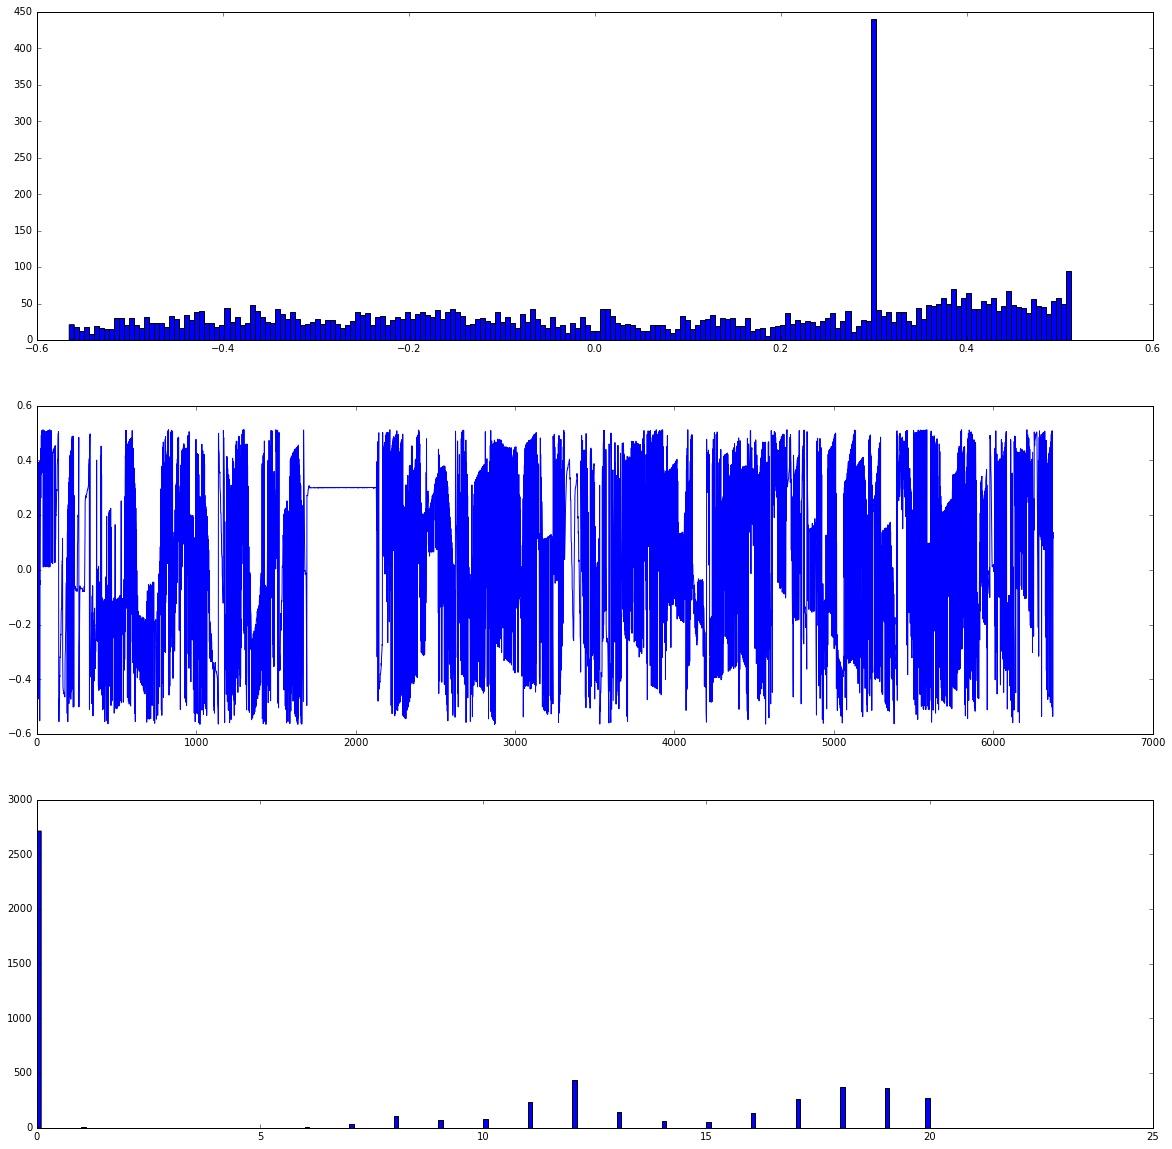

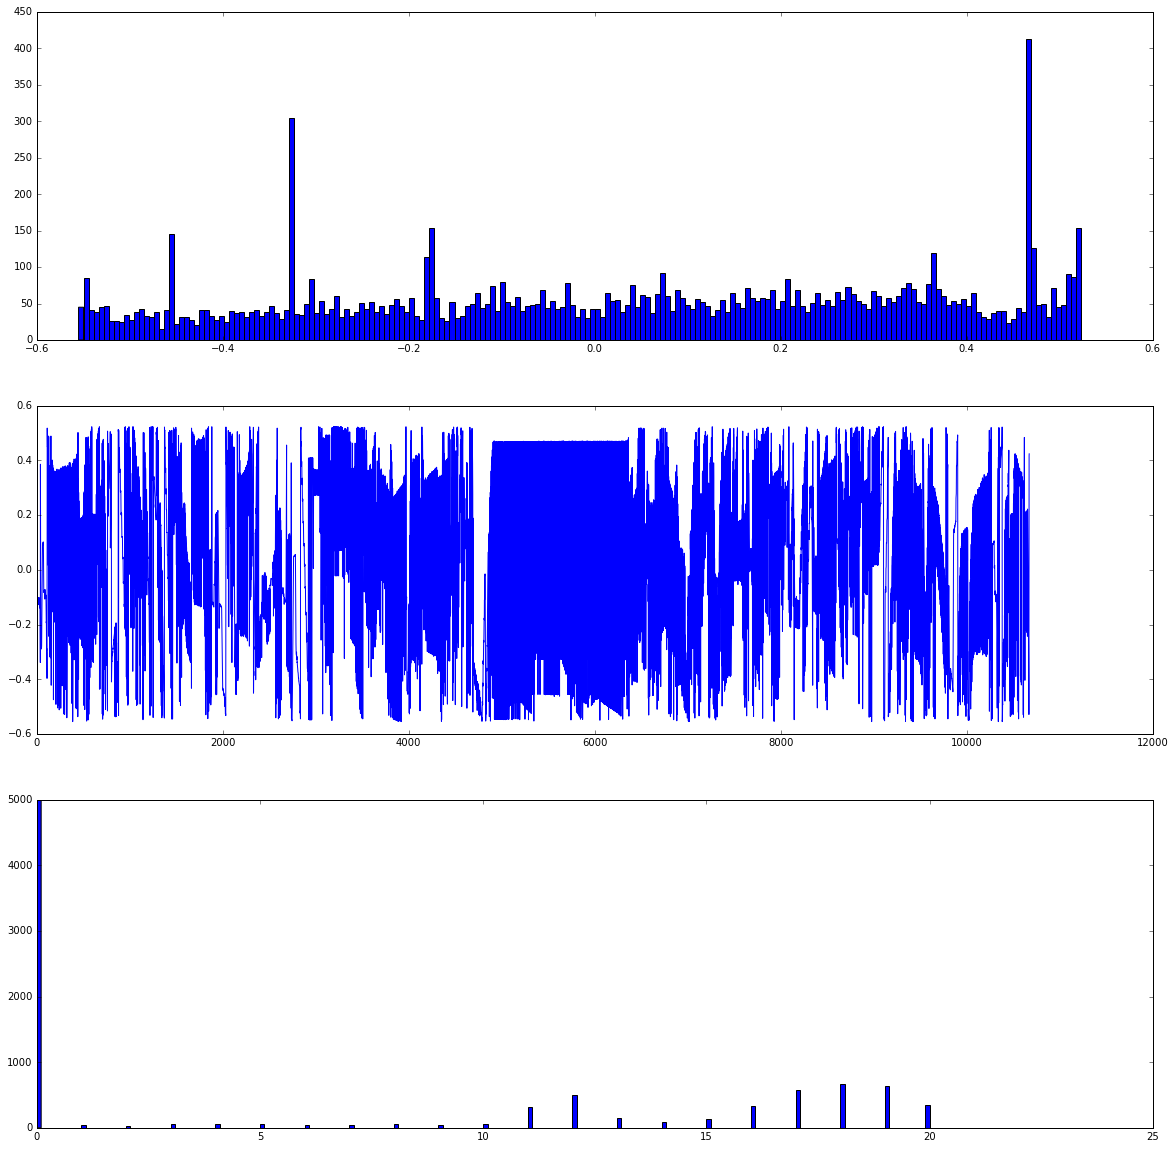

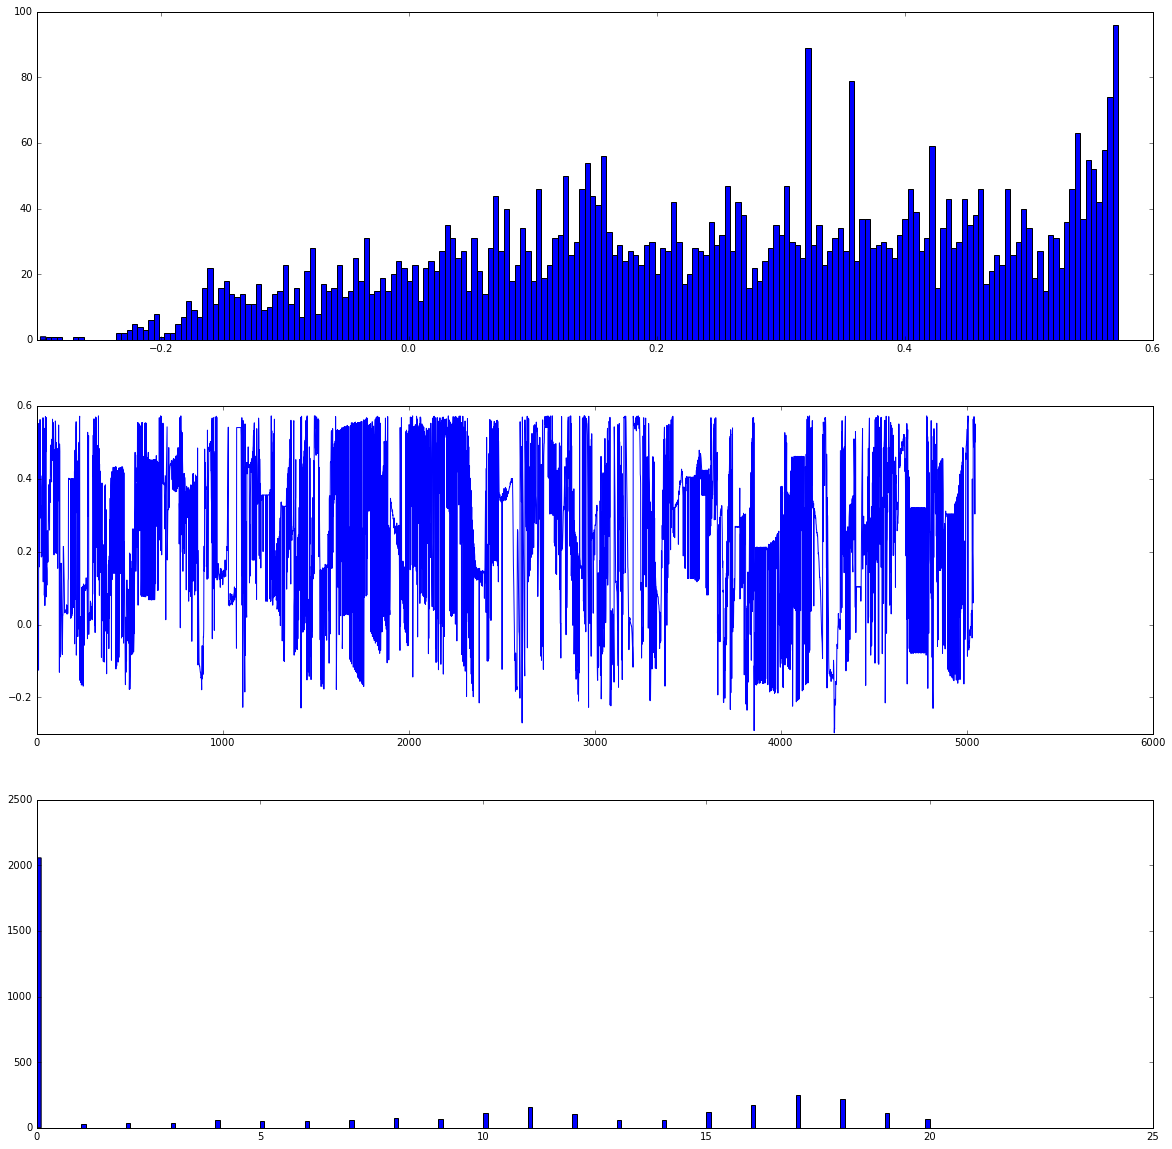

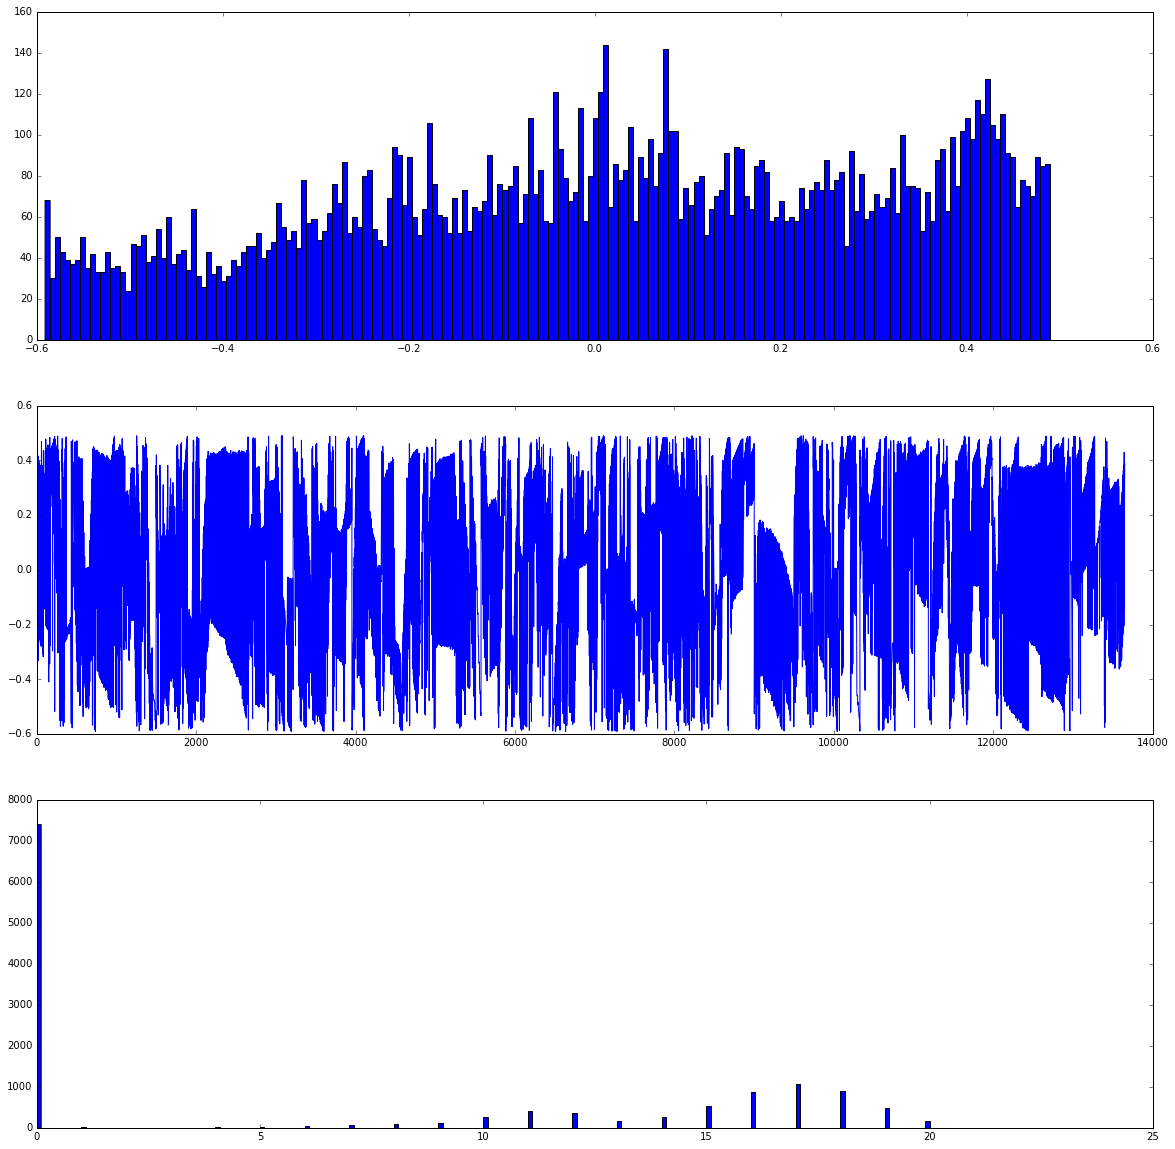

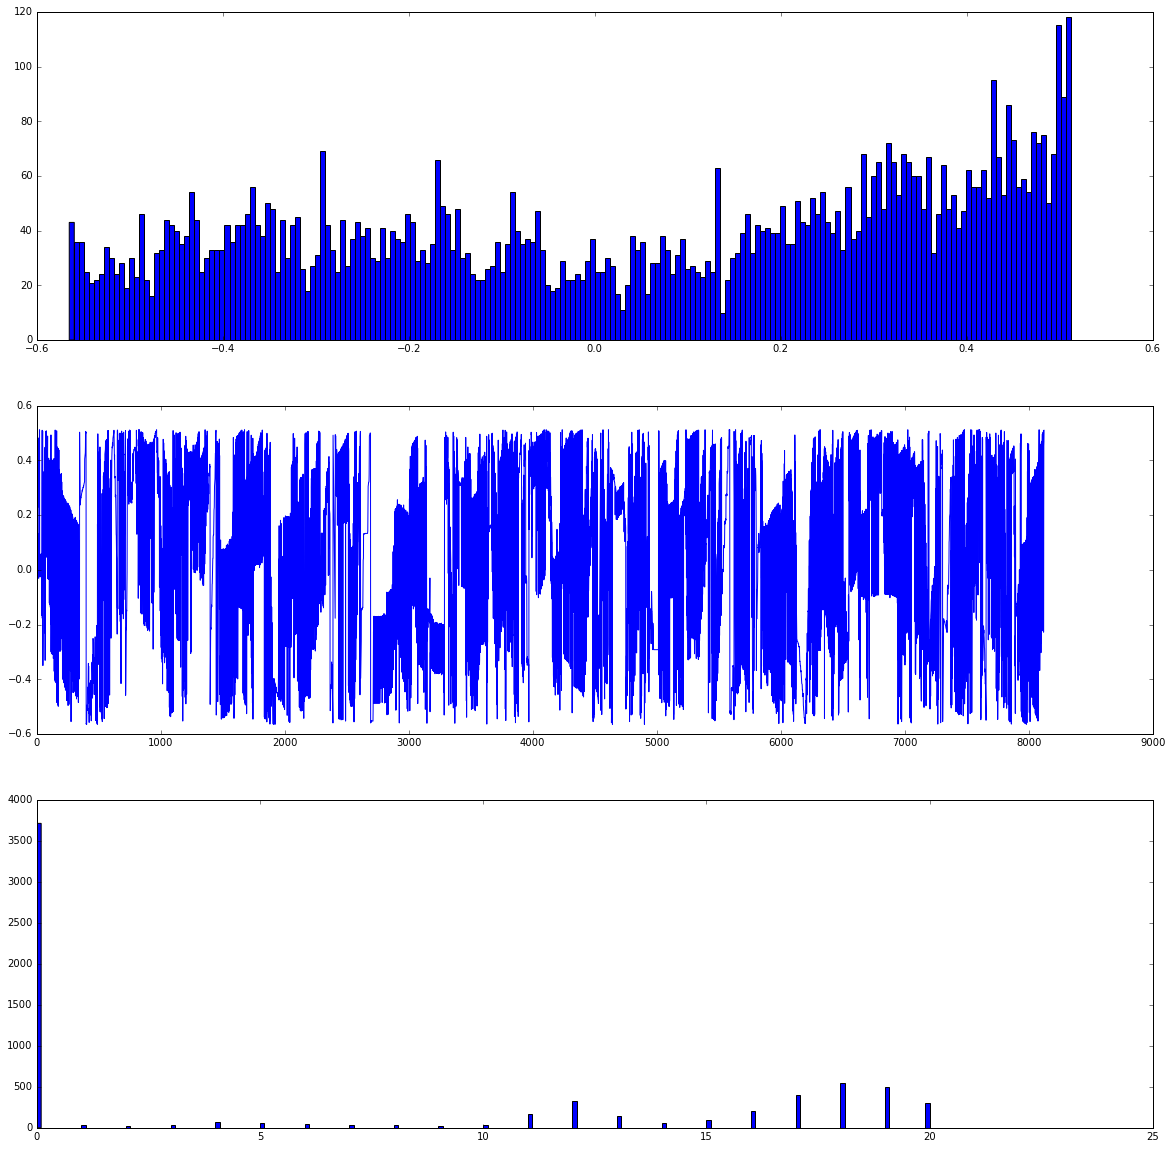

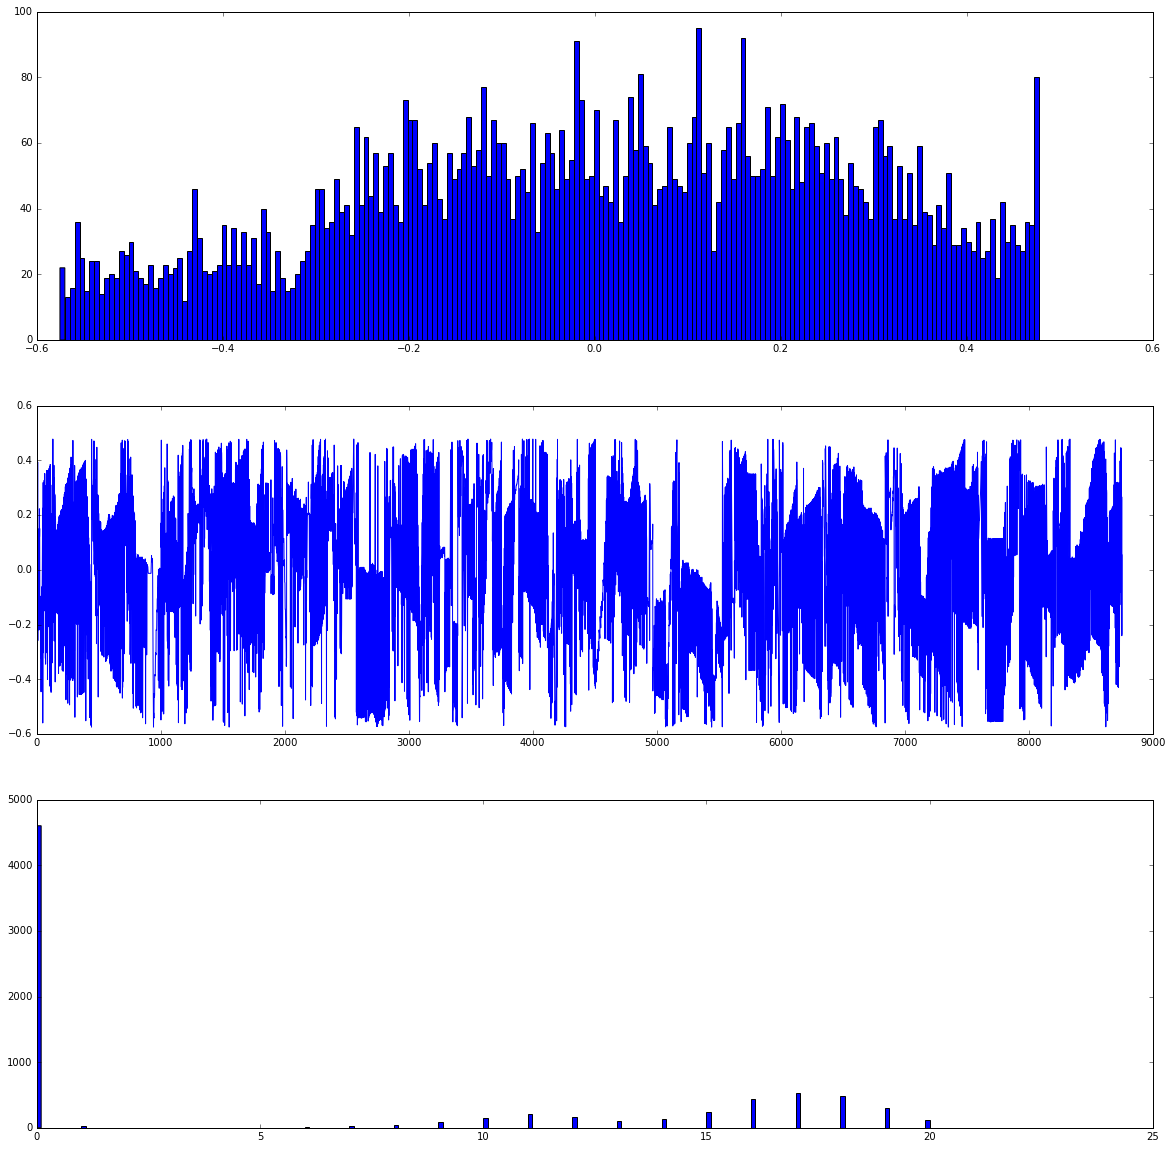

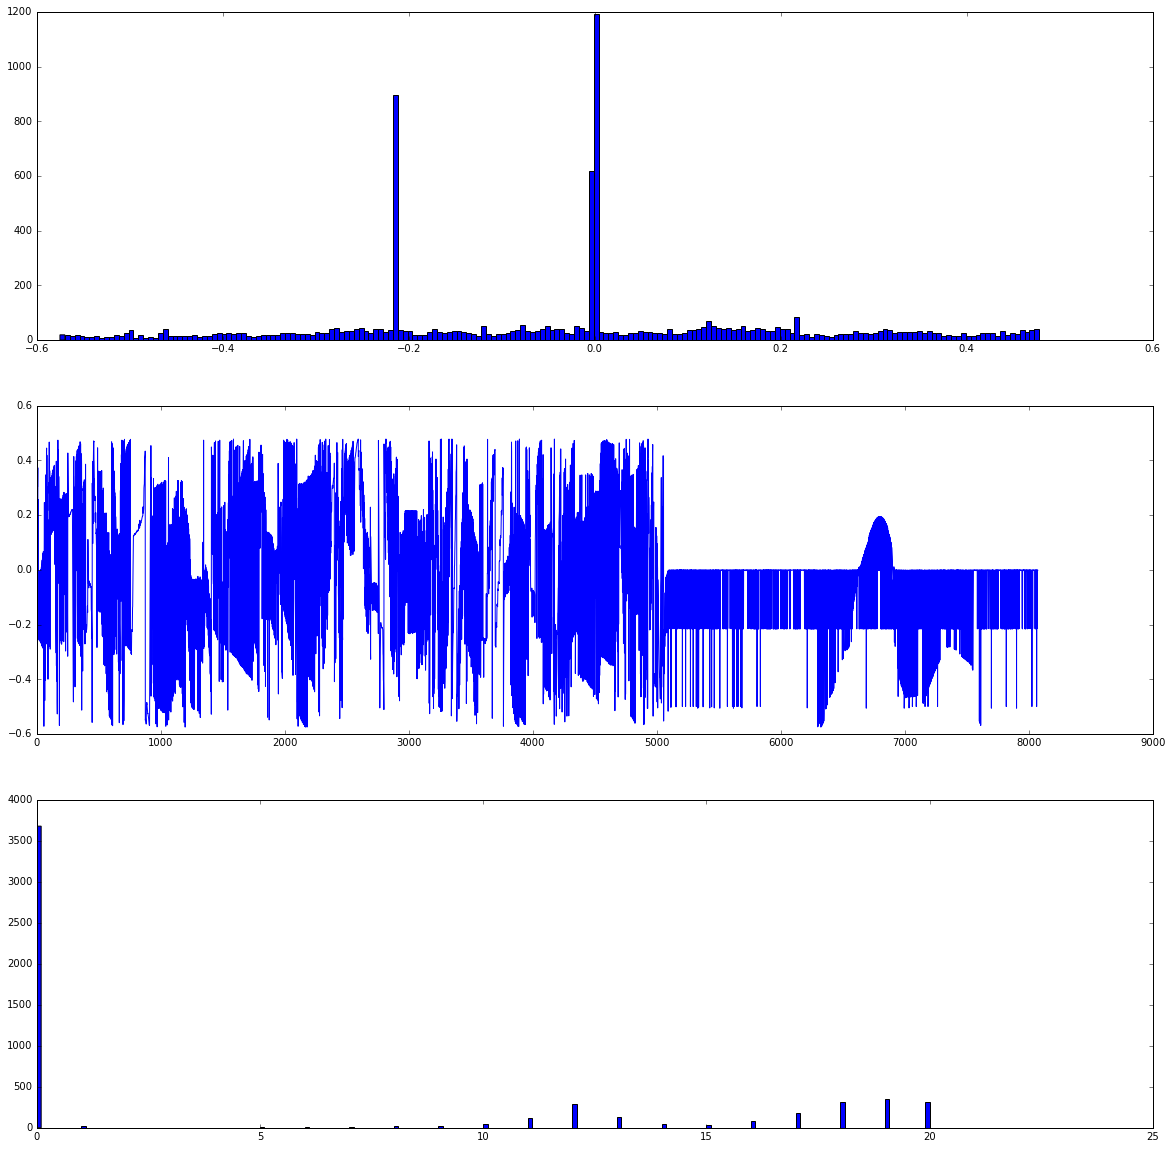

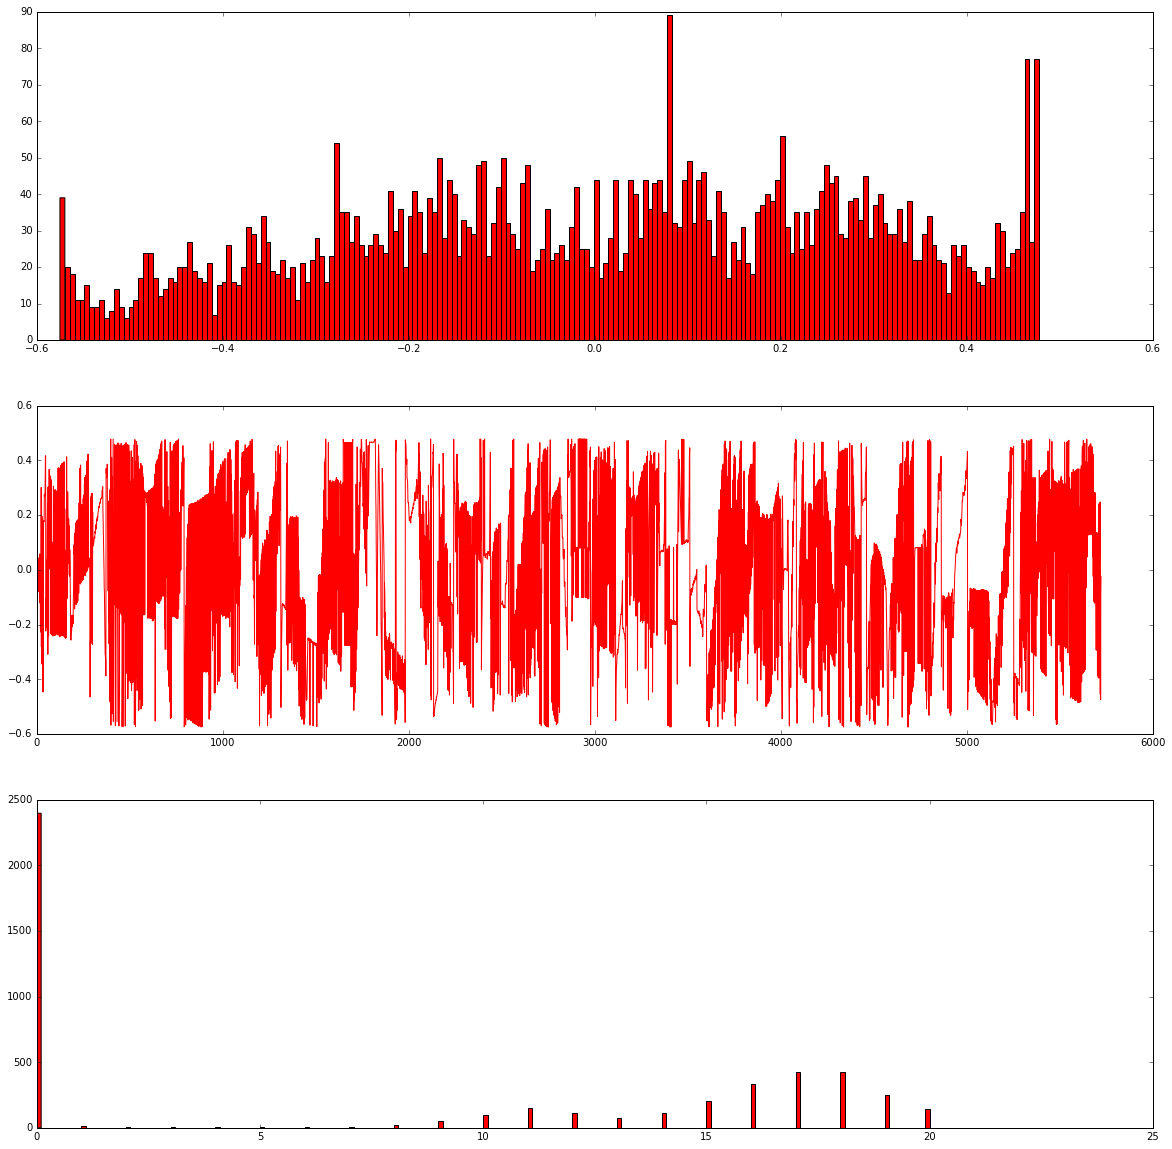

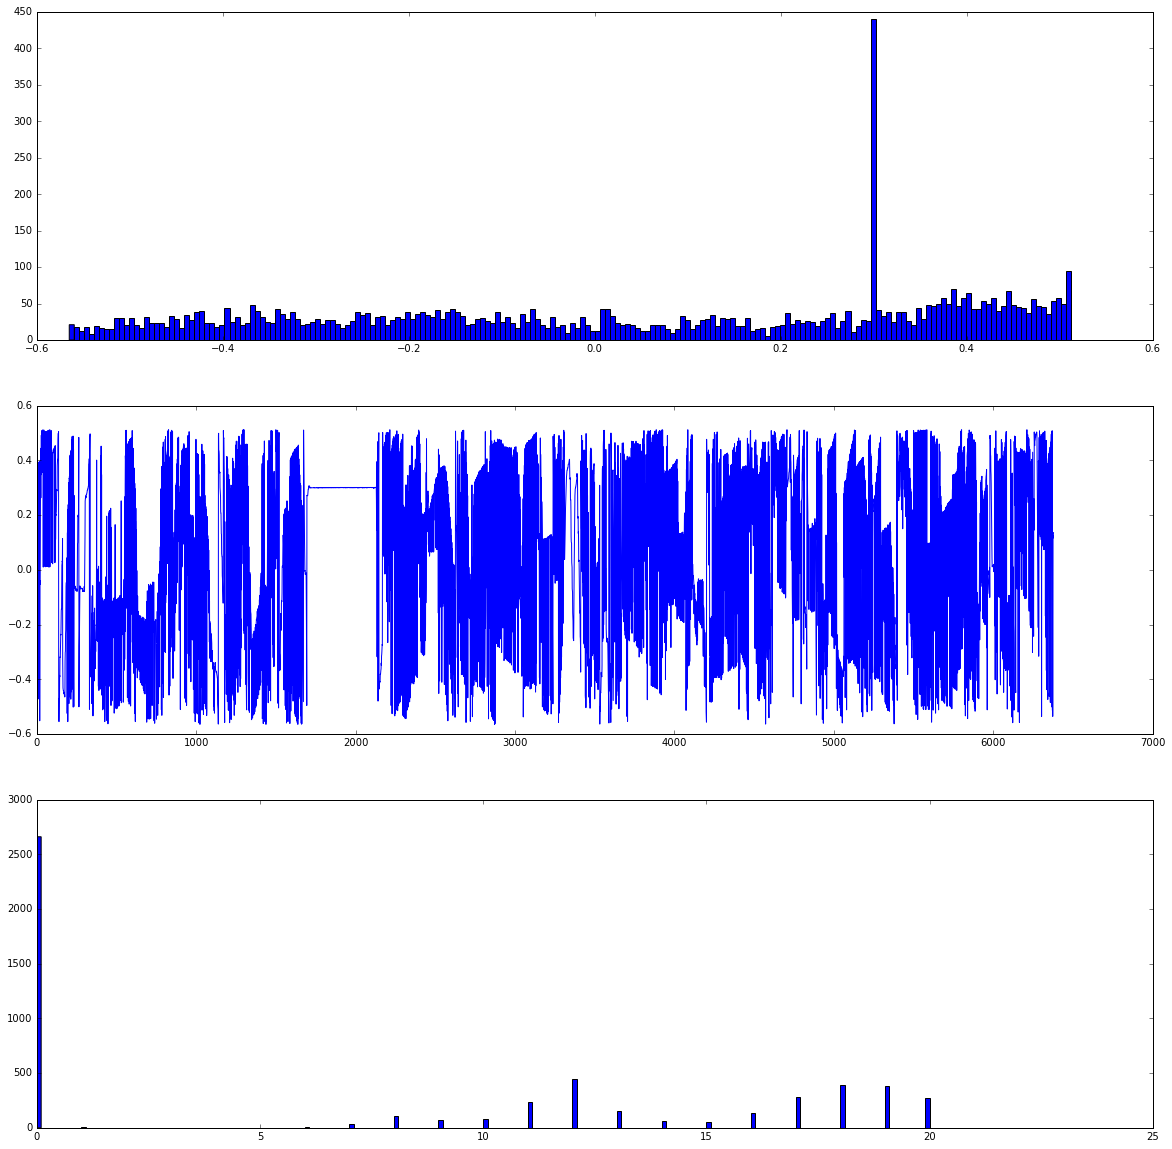

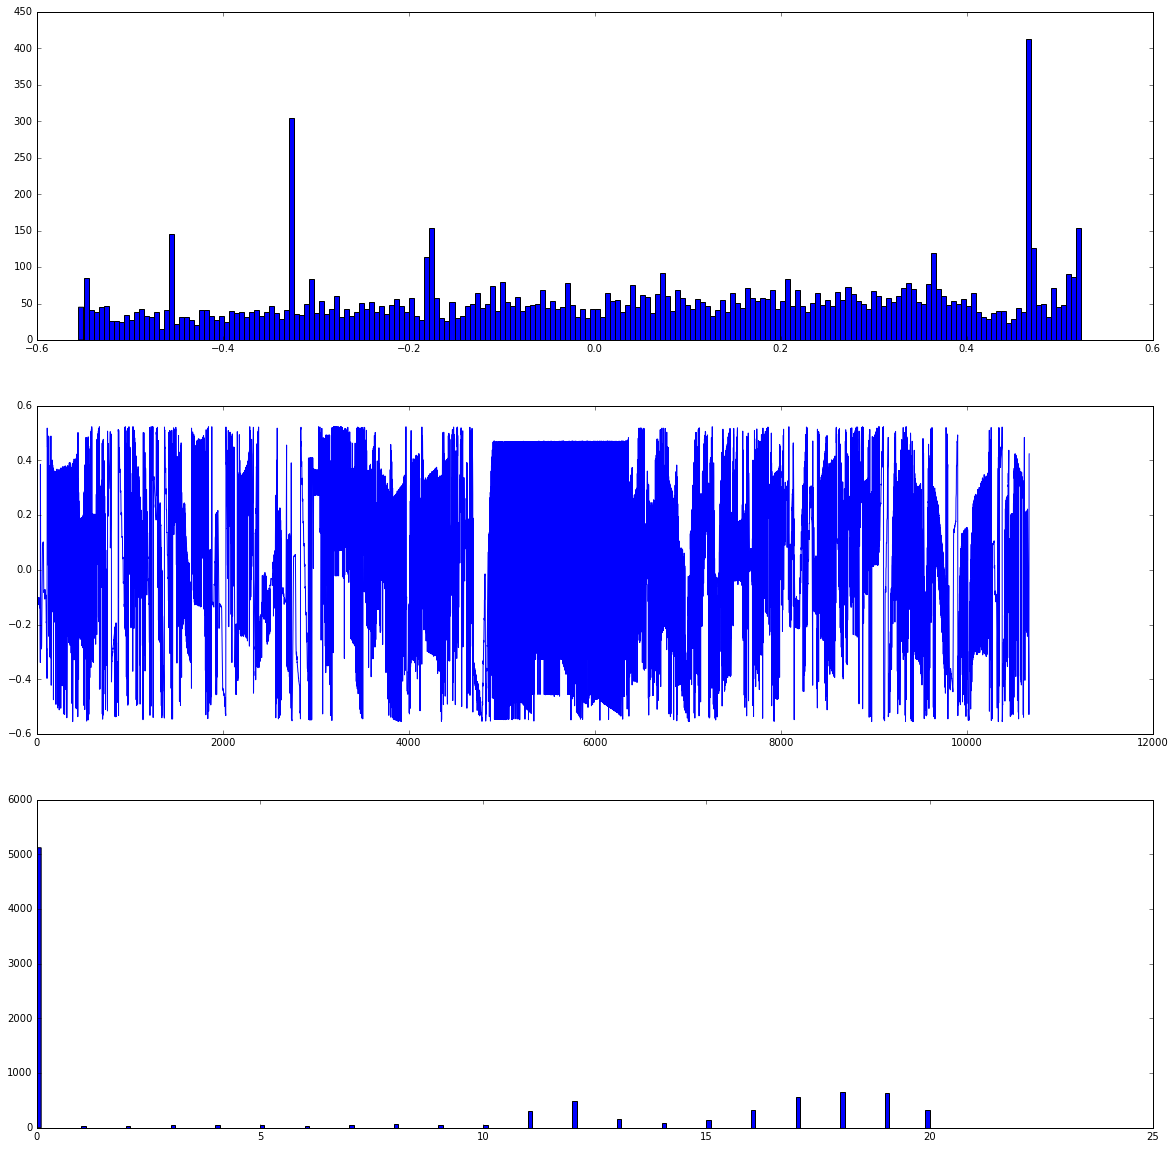

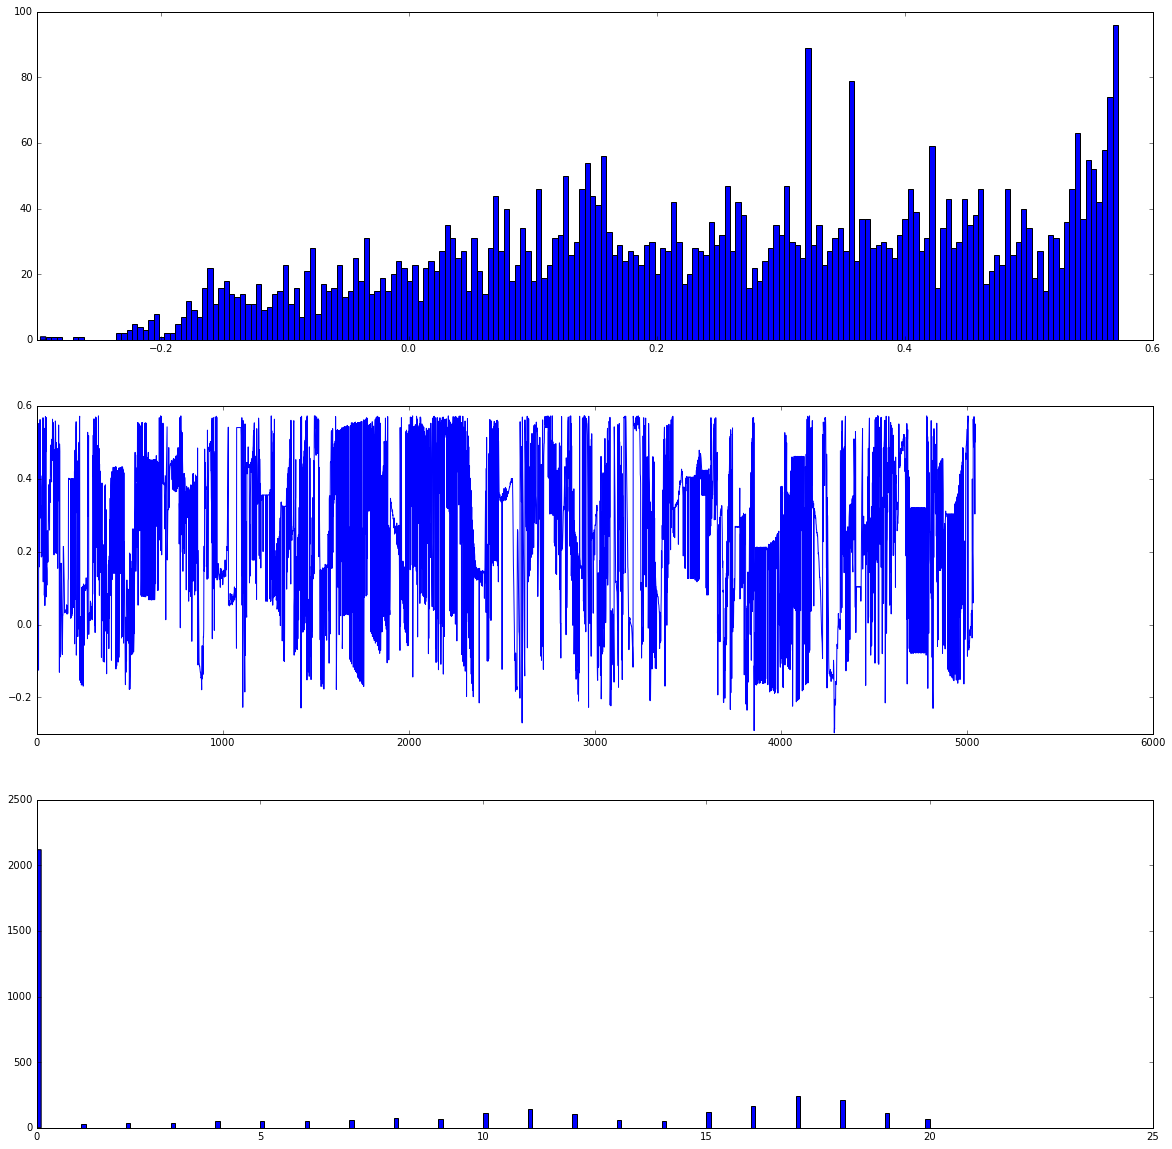

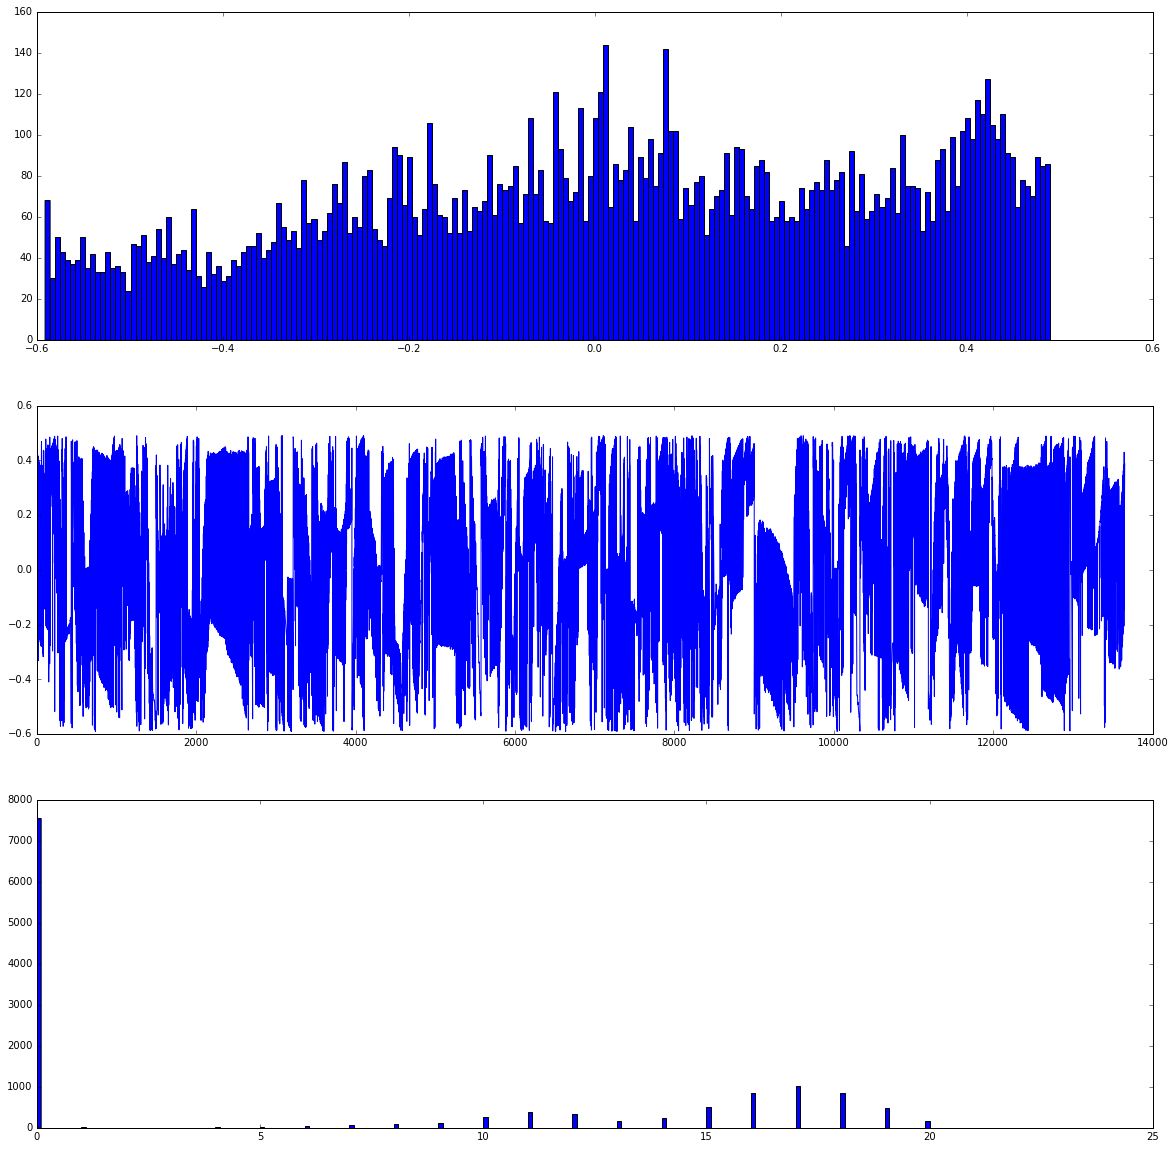

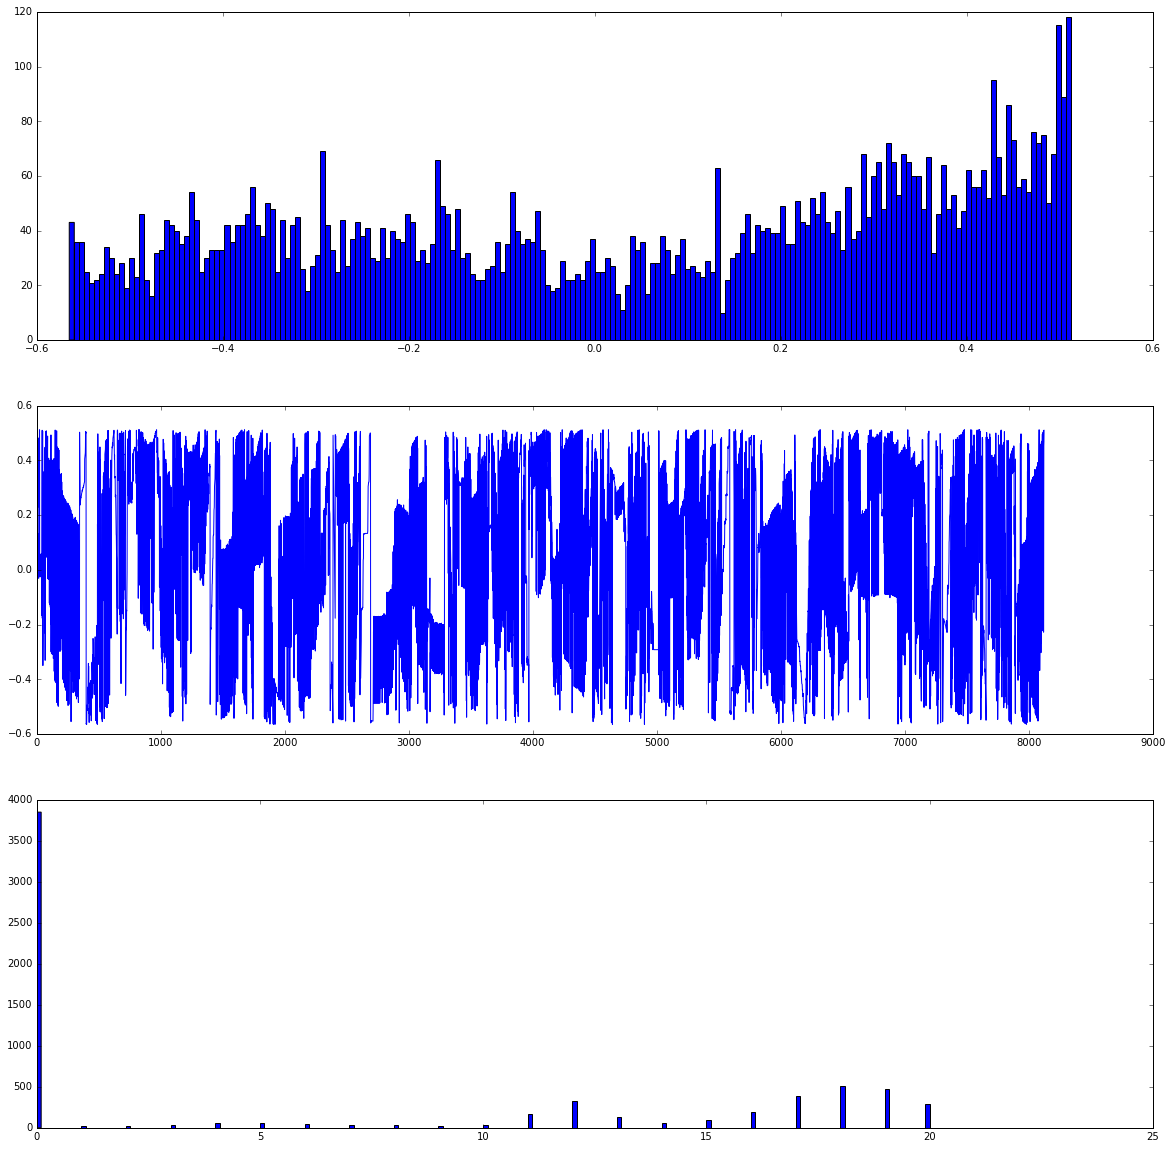

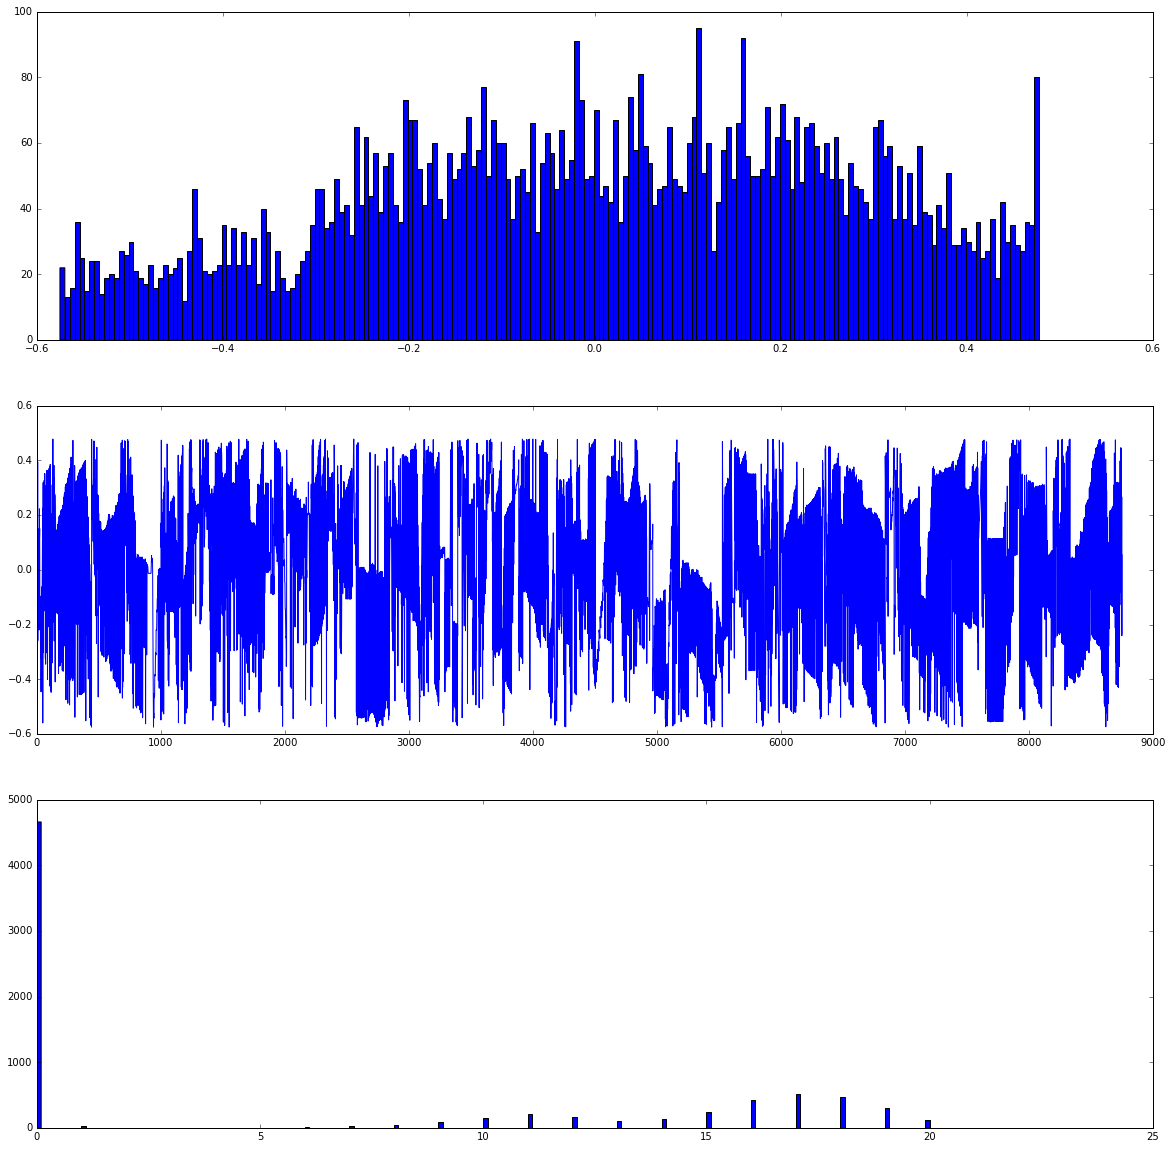

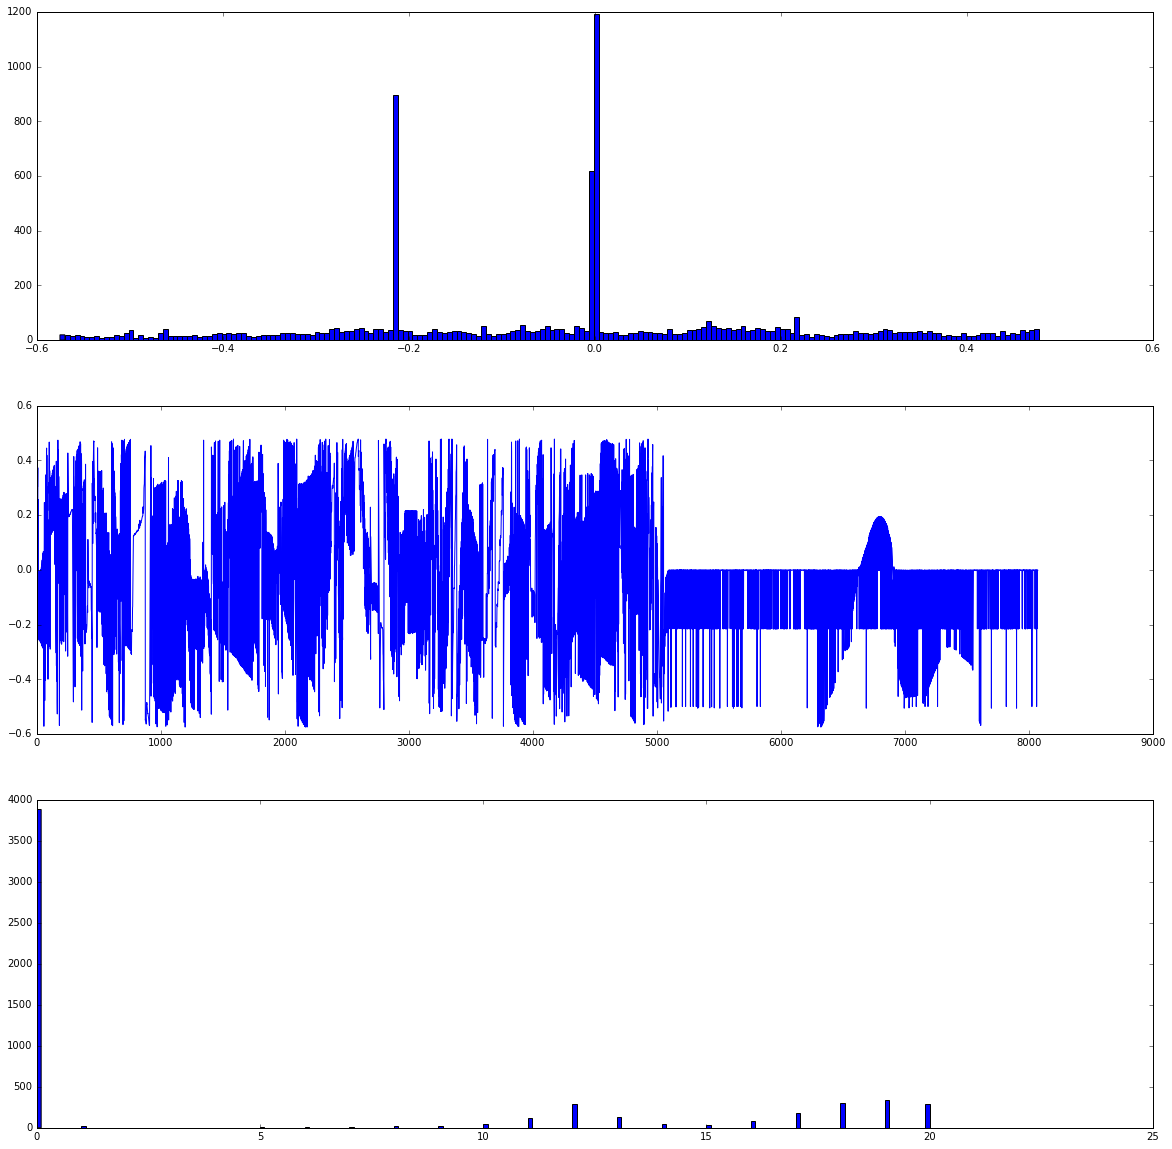

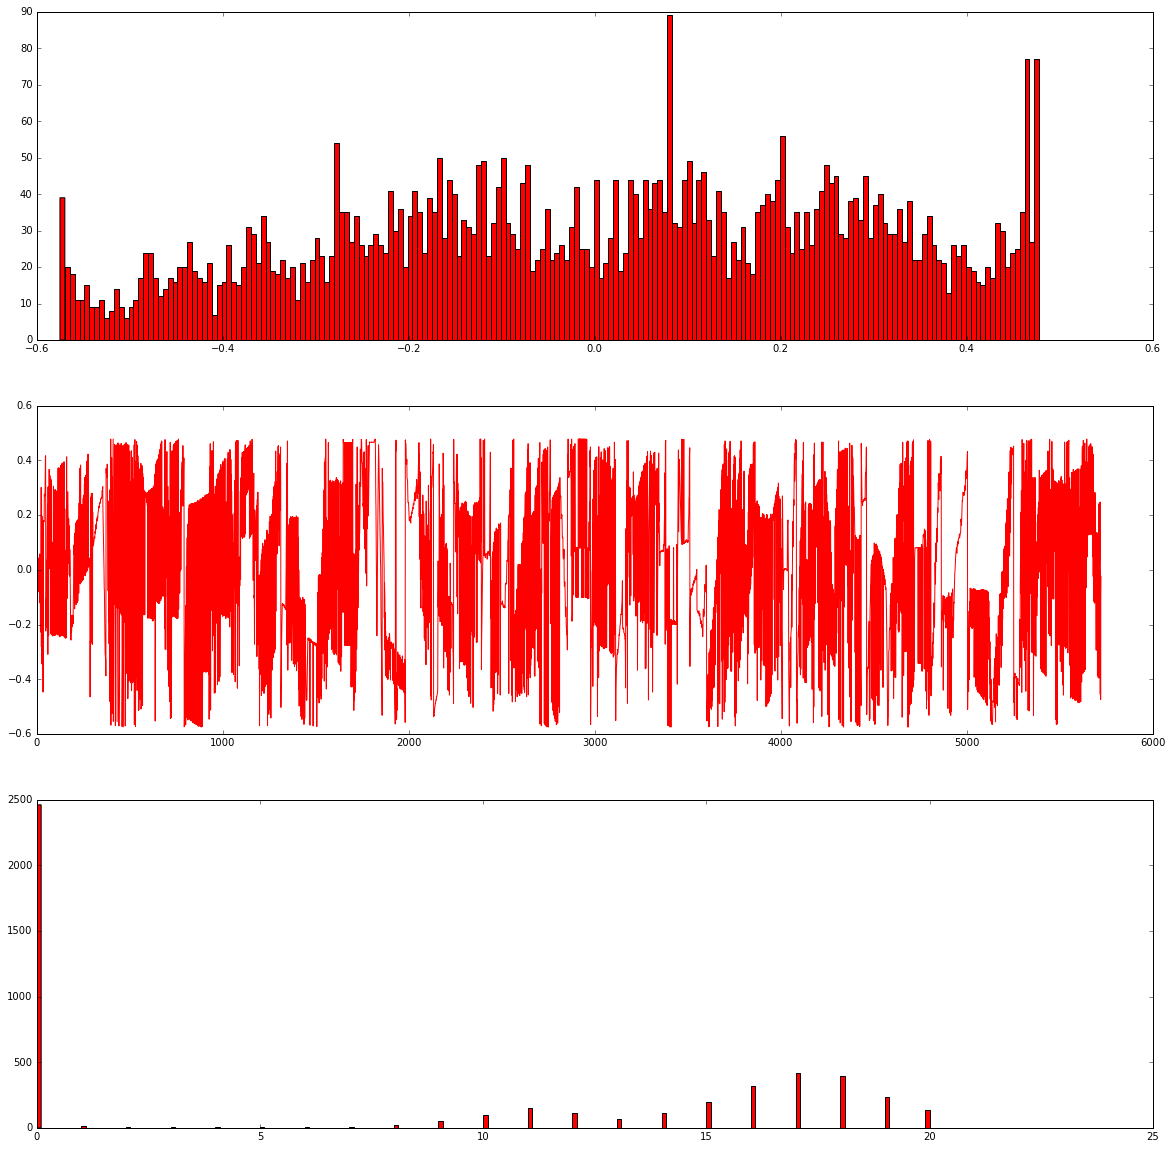

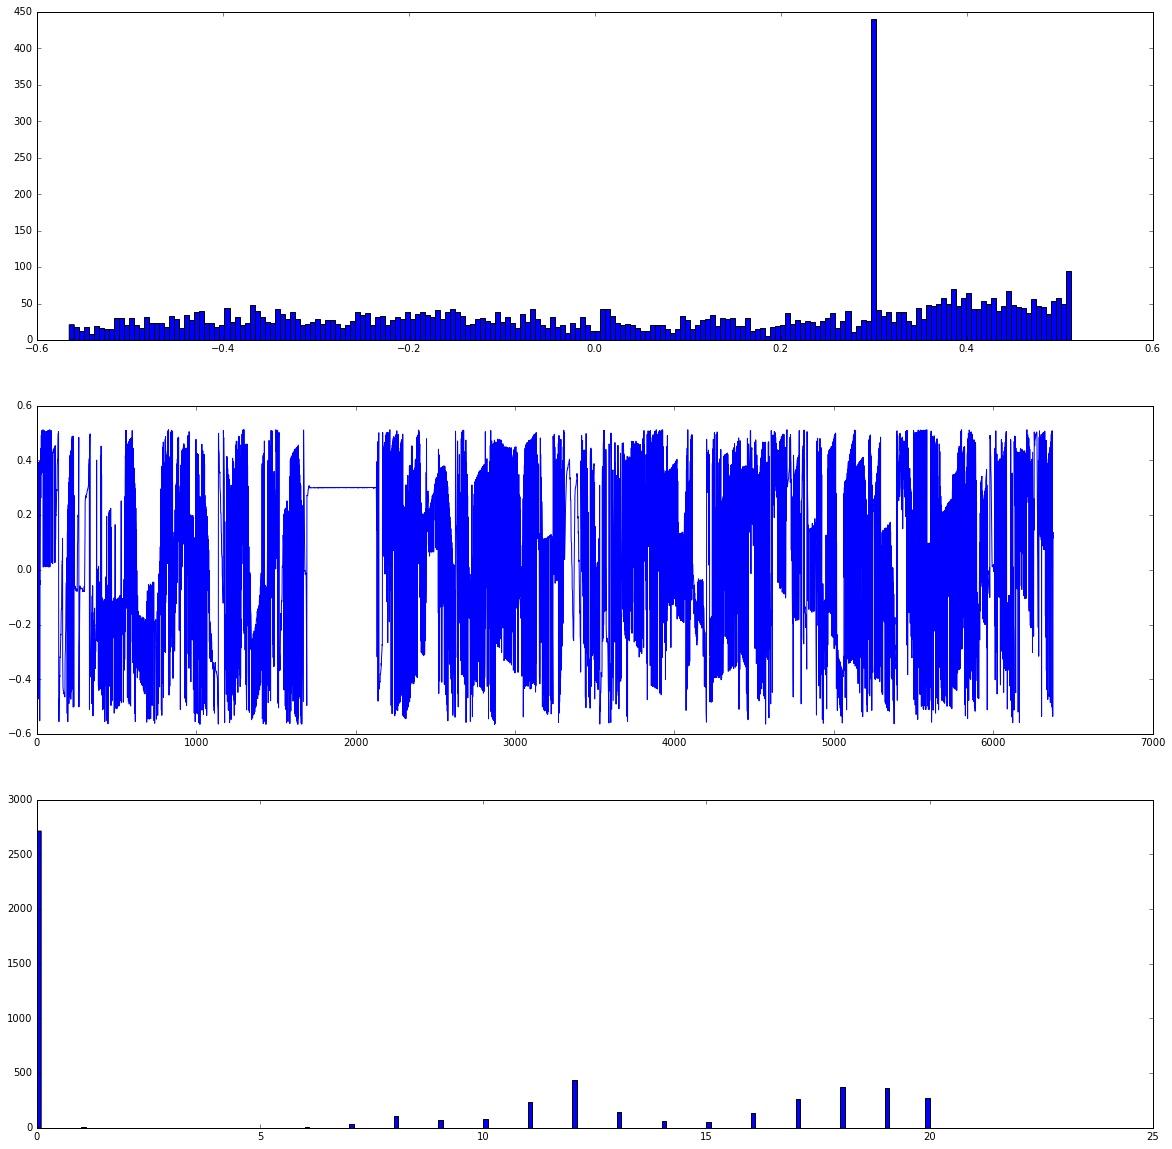

In [24]:


top_robs=[16, 25, 15, 10, 11, 18, 14, 17, 19,  9,  5, 31, 12,  7,  6, 28, 21,
        8, 30, 37, 27, 29, 26, 32, 39]
worst_robs=[i for i in range(40) if i not in top_robs]

np.random.seed(1)
ind=np.random.randint(5)
# rand_rob=[top_robs[ind],worst_robs[2]]
rand_rob=np.random.randint(0,40,8)

print('rand rob ',rand_rob)
for RobotI in rand_rob:
        odom,meas,groun,landDik=getAllMulti((RobotI//5)+1,(RobotI%5)+1)
        with open('betws_lessS/data_{}_betw_{}.meas'.format((RobotI//5)+1,(RobotI%5)+1),"rb") as f:
            bt_Ms,abt_Ms=pickle.load(f)
            
        if RobotI in top_robs:
            plt.figure(figsize=(20,20))
            plt.subplot(311)
            plt.hist(meas[:,3],bins=200,facecolor='blue')
            plt.subplot(312)
            plt.plot(meas[:,3])
            plt.subplot(313)
            plt.hist(abt_Ms,bins=200,range=[0,20])
            
            goodMs=np.array([i for i in meas if int(i[1]) in landDik])
            concL=len(goodMs )-len(set(goodMs[:,0]) )
            print('how much are good vs concurrent',len(goodMs ),concL)
            
            print('average blue',np.percentile(meas[:,2:],(10,20,30,50,75,90,99),axis=0),\
                 'average blue abt {}'.format(np.percentile(abt_Ms,(10,20,30,50,75,90,99) )),'count abs',\
                  sum(abt_Ms==0)- (concL+len(abt_Ms)-len(goodMs)))
        if RobotI in worst_robs:
            plt.figure(figsize=(20,20))
            plt.subplot(311)
            plt.hist(meas[:,3],bins=200,facecolor='red')
            plt.subplot(312)
            plt.plot(meas[:,3],c='red')
            plt.subplot(313)
            plt.hist(abt_Ms,bins=200,range=[0,20],facecolor='red')
            
            goodMs=np.array([i for i in meas if int(i[1]) in landDik])
            concL=len(goodMs )-len(set(goodMs[:,0]) )
            print('how much are good vs concurrent',len(goodMs ),concL)

            
            print('average red',np.percentile(meas[:,2:],(10,20,30,50,75,90,99),axis=0),\
                  'average red abt {}'.format(np.percentile(abt_Ms,(10,20,30,50,75,90,99) )),'count abs',\
                  sum(abt_Ms==0)-(concL+len(abt_Ms)-len(goodMs)))
        